Image format: JPEG
Image size: (735, 496)
Image mode: L


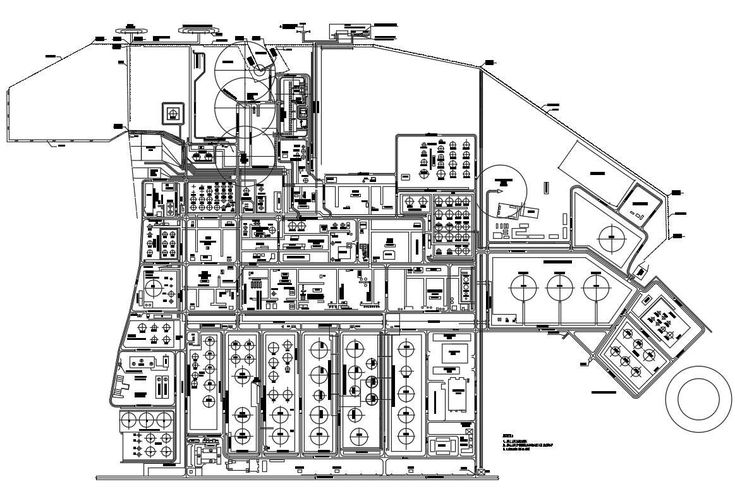

In [2]:
from PIL import Image
from PIL import ImageDraw

# Replace 'refinery_floorplan.jpg' with the actual path to your image file
image_path = 'maps/refinery floor plan.jpg'
try:
    img = Image.open(image_path)
except FileNotFoundError:
    print(f"Error: Image not found at {image_path}")
    exit()

# Display image information (optional)
print(f"Image format: {img.format}")
print(f"Image size: {img.size}")  # (width, height)
print(f"Image mode: {img.mode}")
img

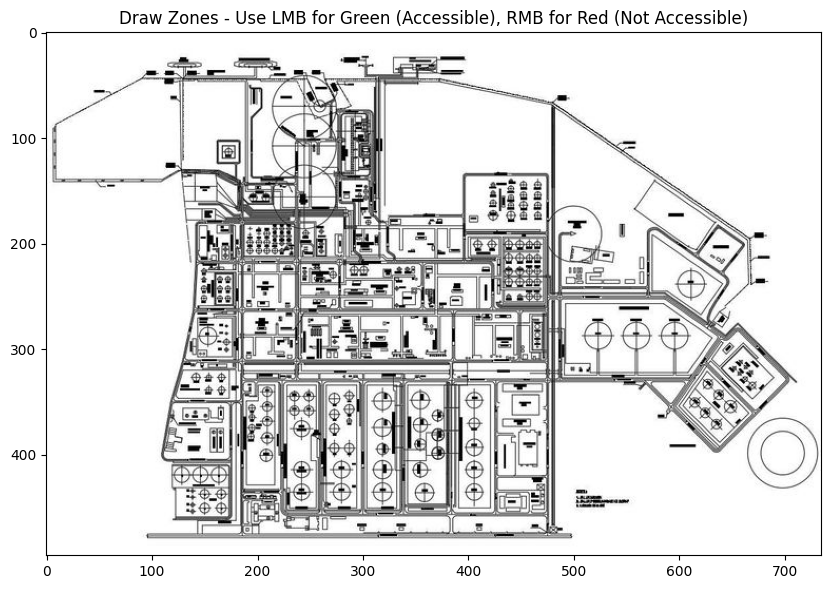

Zones drawn (x, y, color): []


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the floor plan
def load_floor_plan(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    return img

# Plotting function to draw zones manually
def draw_zones(image):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image)
    ax.set_title('Draw Zones - Use LMB for Green (Accessible), RMB for Red (Not Accessible)')

    zones = []  # Store drawn zones

    # Mouse click callback to draw zones
    def onclick(event):
        if event.button == 1:  # Left click - Green (Accessible)
            color = (0, 255, 0)
        elif event.button == 3:  # Right click - Red (Not Accessible)
            color = (255, 0, 0)
        else:
            return
        
        x, y = int(event.xdata), int(event.ydata)
        cv2.circle(image, (x, y), 10, color, -1)  # Draw a filled circle
        zones.append((x, y, color))
        
        ax.imshow(image)  # Update the display
        plt.draw()

    fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()
    return zones

# Main execution
image_path = 'maps/refinery_floorplan.jpg'
floor_plan = load_floor_plan(image_path)
zones = draw_zones(floor_plan)

# Display zones data
print("Zones drawn (x, y, color):", zones)